# Final Notebook

The "War on Drugs", as it is commonly known, has been a topic of discussion for some time now. Our struggle to decrease drug use is a topic of great debate and concern, as thousands die from drug overdoses a year, in the US alone.

Many efforts on the Data Science front have been taken to maximize precision and understanding of the prevalence of drugs in the US, such as the [Substance Abuse and Mental Health Services Administration](https://www.samhsa.gov/). One such effort, [Monitoring the Future](http://www.monitoringthefuture.org/links.html) (MTF), has been collecting data for the past few decades with the purpose of studying adolescent drug trends, and providing more **precise and effective drug intervention** for American youth.

### The Data

This particular [dataset](https://www.icpsr.umich.edu/web/NAHDAP/studies/6716#) from MTF contains demographic and drug use information on approximately **360,000** 12th graders from various schools across the United States. Data comes from surveys given between the years **1995-2019**.


### Things to add here
* Map of schools used in survey?
* Meaning of sampling weight
* Number of questions
* MTF's findings so far
* Origin of MTF

## Exploratory Data Analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

import phik

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data/modeling_data/mtf.csv')

In [54]:
binary_weed = data

In [55]:
binary_weed.binary_weed_month.value_counts()

0          265641
1           77087
Unknown     17082
Name: binary_weed_month, dtype: int64

In [42]:
data.weed_hash_yr_freq.value_counts()

0          265641
1-2X        26123
Unknown     17082
40+         12738
3-5X        12546
10-19X       9521
6-9X         8359
20-39X       7800
Name: weed_hash_month_freq, dtype: int64

In [44]:
conds = [(binary_weed['weed_hash_yr_freq']=='0'), ((binary_weed['weed_hash_yr_freq']!='0')&(data['weed_hash_yr_freq']!='Unknown')),
        (binary_weed['weed_hash_yr_freq']=='Unknown')]

labels = [0, 1, 'Unknown']

binary_weed['binary_weed_yr'] = np.select(conds, labels)

In [47]:
binary_weed.binary_weed_month.value_counts()

0          265641
1           77087
Unknown     17082
Name: binary_weed_month, dtype: int64

In [49]:
binary_weed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359810 entries, 0 to 359809
Columns: 211 entries, yr_adminst to binary_weed_month
dtypes: float64(1), int64(3), object(207)
memory usage: 579.2+ MB


In [50]:
binary_weed.head()

,yr_adminst,sampling_weight,region,msa,smsa,siblings,evr_smoked_cig,cig_month_freq,evr_drink,alcohol_lifetime_freq,alcohol_yr_freq,alcohol_month_freq,alcohol_amount,alcohol_2weeks,weed_hash_lifetime_freq,weed_hash_yr_freq,weed_hash_month_freq,lsd_lifetime_freq,lsd_yr_freq,lsd_month_freq,pysd_lifetime_freq,pysd_yr_freq,pysd_month_freq,coke_lifetime_freq,coke_yr_freq,coke_month_freq,amph_lifetime_freq,amph_yr_freq,amph_month_freq,meth_lifetime_freq,meth_yr_freq,meth_month_freq,sedbarb_lifetime_freq,sedbarb_yr_freq,sedbarb_month_freq,tranq_lifetime_freq,tranq_yr_freq,tranq_month_freq,heroin_lifetime_freq,heroin_yr_freq,heroin_month_freq,narcotic_lifetime_freq,narcotic_yr_freq,narcotic_month_freq,inhal_lifetime_freq,inhal_yr_freq,inhal_month_freq,age,sex,race_bwh,area_type,marital_status,lives_alone,has_father,has_mother,has_siblings,hshld_grandparents,hshld_spouse,hshld_children,hshld_relatives,hshld_nonrelatives,father_educ_lvl,mother_educ_lvl,mother_employed,political_party,political_value_type,relig_pref,relig_attd,relig_importance,hs_grad_yr,hs_type,academic_self_rating,intelligence_self_rating,school_missed_illness,school_missed_ditched,school_missed_other,skipped_class,avg_grade,tech_school_after_hs,military_after_hs,2yrcoll_after_hs,4yrcoll_after_hs,gradsch_after_hs,desire_tech_school,desire_military,desire_2yrcoll,desire_4yrcoll,desire_gradsch,desire_none,work_hrs,work_pay,other_income,rec_time,date_freq,drive_freq,12mo_r_tcktd,tckts_aft_drnk,tckts_aft_marj,tckts_aft_otdg,12mo_accidents,acdts_aft_drnk,acdts_aft_marj,acdts_aft_otdg,mil_branch_pref,mil_officer_pref,expect_mil_career,hash_lifetime_freq,hash_yr_freq,hash_month_freq,weed_lifetime_freq,weed_yr_freq,weed_month_freq,evr_tobacco,bidi_yr_freq,kreteks_yr_freq,drunk_lifetime_freq,drunk_yr_freq,drunk_month_freq,beer_lifetime_freq,beer_yr_freq,beer_month_freq,beer_2week,winecool_lifetime_freq,winecool_yr_freq,winecool_month_freq,winecool_2week,wine_lifetime_freq,wine_yr_freq,wine_month_freq,wine_2week,liqr_lifetime_freq,liqr_yr_freq,liqr_month_freq,liqr_2week,flvrdalc_lifetime_freq,flvrdalc_yr_freq,flvrdalc_month_freq,pcp_lifetime_freq,pcp_yr_freq,pcp_month_freq,mdma_lifetime_freq,mdma_yr_freq,mdma_month_freq,crack_lifetime_freq,crack_yr_freq,crack_month_freq,othcoke_lifetime_freq,othcoke_yr_freq,othcoke_month_freq,ritalin_yr_freq,dietpill_lifetime_freq,dietpill_yr_freq,dietpill_month_freq,staawak_lifetime_freq,staawak_yr_freq,staawak_month_freq,lookalik_lifetime_freq,lookalik_yr_freq,lookalik_month_freq,quaa_lifetime_freq,quaa_yr_freq,quaa_month_freq,roofi_yr_freq,ghb_yr_freq,keta_yr_freq,needle_lifetime_freq,needle_yr_freq,needle_month_freq,nnher_lifetime_freq,nnher_yr_freq,nnher_month_freq,inject_lifetime_freq,inject_yr_freq,inject_month_freq,oxy_yr_freq,vico_yr_freq,pprs_lifetime_freq,pprs_yr_freq,pprs_month_freq,steroid_lifetime_freq,steroid_yr_freq,steroid_month_freq,andro_yr_freq,creatine_yr_freq,coughmed_yr_freq,adderall_yr_freq,salvia_yr_freq,provigil_yr_freq,hookah_yr_freq,smcigars_yr_freq,nrg_drinks_day,nrg_shots_day,alc_caffeine_yr_freq,syn_marj_yr_freq,ecig_month_freq,bath_salts_yr_freq,lrg_cigar_month_freq,flvd_cigar_month_freq,sml_cigar_month_freq,syn_marj_month_freq,hgh_yr_freq,pwd_alc_yr_freq,hookah_month_freq,evr_vape,vape_marj_lifetime_freq,vape_marj_yr_freq,vape_marj_month_freq,vape_flav_lifetime_freq,vape_flav_yr_freq,vape_flav_month_freq,binary_weed_month
0,1995,0.6,Midwest,1,1,1,Never,None,Unknown,0,0,None,Unknown,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Male,White,Medium City,Single,No,No,Yes,Yes,No,No,No,No,No,Graduated HS,College Grad,Yes/Nearly All,Don't Know,Don't Know,None,Rarely,A Little Important,June,Academic/College Prep,Average,Slightly Above Average,0,0,0,0,B+,Probably Will,Definitely Won't,Definitely Will,Definitely Will,Definitely Will,No,No,No,No,Yes,No,30+,126-175,0,4-5,2-3x Month,51-100,0,Unknown,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unk

In [51]:
binary_weed.to_csv('data/modeling_data/mtf_marj_target_month.csv', index=False)

In [40]:
model7.columns

Index(['sampling_weight', 'region', 'siblings', 'evr_drink', 'has_father',
       'father_educ_lvl', 'alcohol_yr_freq', 'alcohol_month_freq', 'age',
       'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating',
       'relig_importance', 'political_party', 'relig_attd',
       'school_missed_ditched', 'skipped_class', 'avg_grade',
       '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 'work_hrs',
       'work_pay', 'other_income', 'rec_time', '12mo_r_tcktd',
       '12mo_accidents', 'drug_binary'],
      dtype='object')

In [14]:
any_drug = data

In [16]:
drug_cols = ['weed_hash_lifetime_freq', 'lsd_lifetime_freq', 'pysd_lifetime_freq',
             'coke_lifetime_freq', 'amph_lifetime_freq', 'meth_lifetime_freq',
             'sedbarb_lifetime_freq', 'tranq_lifetime_freq', 'heroin_lifetime_freq', 
             'narcotic_lifetime_freq', 'inhal_lifetime_freq']

In [52]:
data.narcotic_yr_freq.value_counts()

0          310991
Unknown     26371
1-2X        10362
3-5X         4631
6-9X         2813
10-19X       2211
40+          1286
20-39X       1145
Name: narcotic_yr_freq, dtype: int64

In [17]:
for col in drug_cols:
    
    conds = [((any_drug[col] == '0')|(any_drug[col] == 0)),
             ((any_drug[col] != '0')&(any_drug[col] != 0)&(any_drug[col] != 'Unknown')),
            (any_drug[col] == 'Unknown')]
    choices = [0,1, 'Unknown']
    
    any_drug[col] = np.select(conds, choices)
    print(any_drug[col].value_counts(), '\n\n')

0          182906
1          151214
Unknown     25690
Name: weed_hash_lifetime_freq, dtype: int64 


0          311694
Unknown     25113
1           23003
Name: lsd_lifetime_freq, dtype: int64 


0          310539
Unknown     26351
1           22920
Name: pysd_lifetime_freq, dtype: int64 


0          320785
1           21260
Unknown     17765
Name: coke_lifetime_freq, dtype: int64 


0          297795
1           42516
Unknown     19499
Name: amph_lifetime_freq, dtype: int64 


Unknown    228049
0          126633
1            5128
Name: meth_lifetime_freq, dtype: int64 


0          302820
Unknown     30290
1           26700
Name: sedbarb_lifetime_freq, dtype: int64 


0          314656
1           28883
Unknown     16271
Name: tranq_lifetime_freq, dtype: int64 


0          338818
Unknown     16202
1            4790
Name: heroin_lifetime_freq, dtype: int64 


0          299830
1           33637
Unknown     26343
Name: narcotic_lifetime_freq, dtype: int64 


0          171238
Unknown 

In [134]:
model7['num_drugs_lifetime'] = model7.weed_hash_lifetime_freq.astype(int)+model7.lsd_lifetime_freq.astype(int)+model7.pysd_lifetime_freq.astype(int)+model7.coke_lifetime_freq.astype(int)+model7.amph_lifetime_freq.astype(int)+model7.meth_lifetime_freq.astype(int)+model7.sedbarb_lifetime_freq.astype(int)+model7.tranq_lifetime_freq.astype(int)+model7.heroin_lifetime_freq.astype(int)+model7.narcotic_lifetime_freq.astype(int)+model7.inhal_lifetime_freq.astype(int)
        
        

<ipython-input-134-f6a90b1c1017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model7['num_drugs_lifetime'] = model7.weed_hash_lifetime_freq.astype(int)+model7.lsd_lifetime_freq.astype(int)+model7.pysd_lifetime_freq.astype(int)+model7.coke_lifetime_freq.astype(int)+model7.amph_lifetime_freq.astype(int)+model7.meth_lifetime_freq.astype(int)+model7.sedbarb_lifetime_freq.astype(int)+model7.tranq_lifetime_freq.astype(int)+model7.heroin_lifetime_freq.astype(int)+model7.narcotic_lifetime_freq.astype(int)+model7.inhal_lifetime_freq.astype(int)


In [140]:
drug_conds = [(model7['num_drugs_lifetime']==0),(model7['num_drugs_lifetime']!=0)]

drug_lbls = [0,1]

model7['drug_binary'] = np.select(drug_conds, drug_lbls) # 0 - 17525

<ipython-input-140-bb8fd57d9d21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model7['drug_binary'] = np.select(drug_conds, drug_lbls) # 0 - 17525


In [19]:
data.weed_hash_month_freq.value_counts()

0          265641
1-2X        26123
Unknown     17082
40+         12738
3-5X        12546
10-19X       9521
6-9X         8359
20-39X       7800
Name: weed_hash_month_freq, dtype: int64

In [18]:
any_drug.head()

,yr_adminst,sampling_weight,region,msa,smsa,siblings,evr_smoked_cig,cig_month_freq,evr_drink,alcohol_lifetime_freq,alcohol_yr_freq,alcohol_month_freq,alcohol_amount,alcohol_2weeks,weed_hash_lifetime_freq,weed_hash_yr_freq,weed_hash_month_freq,lsd_lifetime_freq,lsd_yr_freq,lsd_month_freq,pysd_lifetime_freq,pysd_yr_freq,pysd_month_freq,coke_lifetime_freq,coke_yr_freq,coke_month_freq,amph_lifetime_freq,amph_yr_freq,amph_month_freq,meth_lifetime_freq,meth_yr_freq,meth_month_freq,sedbarb_lifetime_freq,sedbarb_yr_freq,sedbarb_month_freq,tranq_lifetime_freq,tranq_yr_freq,tranq_month_freq,heroin_lifetime_freq,heroin_yr_freq,heroin_month_freq,narcotic_lifetime_freq,narcotic_yr_freq,narcotic_month_freq,inhal_lifetime_freq,inhal_yr_freq,inhal_month_freq,age,sex,race_bwh,area_type,marital_status,lives_alone,has_father,has_mother,has_siblings,hshld_grandparents,hshld_spouse,hshld_children,hshld_relatives,hshld_nonrelatives,father_educ_lvl,mother_educ_lvl,mother_employed,political_party,political_value_type,relig_pref,relig_attd,relig_importance,hs_grad_yr,hs_type,academic_self_rating,intelligence_self_rating,school_missed_illness,school_missed_ditched,school_missed_other,skipped_class,avg_grade,tech_school_after_hs,military_after_hs,2yrcoll_after_hs,4yrcoll_after_hs,gradsch_after_hs,desire_tech_school,desire_military,desire_2yrcoll,desire_4yrcoll,desire_gradsch,desire_none,work_hrs,work_pay,other_income,rec_time,date_freq,drive_freq,12mo_r_tcktd,tckts_aft_drnk,tckts_aft_marj,tckts_aft_otdg,12mo_accidents,acdts_aft_drnk,acdts_aft_marj,acdts_aft_otdg,mil_branch_pref,mil_officer_pref,expect_mil_career,hash_lifetime_freq,hash_yr_freq,hash_month_freq,weed_lifetime_freq,weed_yr_freq,weed_month_freq,evr_tobacco,bidi_yr_freq,kreteks_yr_freq,drunk_lifetime_freq,drunk_yr_freq,drunk_month_freq,beer_lifetime_freq,beer_yr_freq,beer_month_freq,beer_2week,winecool_lifetime_freq,winecool_yr_freq,winecool_month_freq,winecool_2week,wine_lifetime_freq,wine_yr_freq,wine_month_freq,wine_2week,liqr_lifetime_freq,liqr_yr_freq,liqr_month_freq,liqr_2week,flvrdalc_lifetime_freq,flvrdalc_yr_freq,flvrdalc_month_freq,pcp_lifetime_freq,pcp_yr_freq,pcp_month_freq,mdma_lifetime_freq,mdma_yr_freq,mdma_month_freq,crack_lifetime_freq,crack_yr_freq,crack_month_freq,othcoke_lifetime_freq,othcoke_yr_freq,othcoke_month_freq,ritalin_yr_freq,dietpill_lifetime_freq,dietpill_yr_freq,dietpill_month_freq,staawak_lifetime_freq,staawak_yr_freq,staawak_month_freq,lookalik_lifetime_freq,lookalik_yr_freq,lookalik_month_freq,quaa_lifetime_freq,quaa_yr_freq,quaa_month_freq,roofi_yr_freq,ghb_yr_freq,keta_yr_freq,needle_lifetime_freq,needle_yr_freq,needle_month_freq,nnher_lifetime_freq,nnher_yr_freq,nnher_month_freq,inject_lifetime_freq,inject_yr_freq,inject_month_freq,oxy_yr_freq,vico_yr_freq,pprs_lifetime_freq,pprs_yr_freq,pprs_month_freq,steroid_lifetime_freq,steroid_yr_freq,steroid_month_freq,andro_yr_freq,creatine_yr_freq,coughmed_yr_freq,adderall_yr_freq,salvia_yr_freq,provigil_yr_freq,hookah_yr_freq,smcigars_yr_freq,nrg_drinks_day,nrg_shots_day,alc_caffeine_yr_freq,syn_marj_yr_freq,ecig_month_freq,bath_salts_yr_freq,lrg_cigar_month_freq,flvd_cigar_month_freq,sml_cigar_month_freq,syn_marj_month_freq,hgh_yr_freq,pwd_alc_yr_freq,hookah_month_freq,evr_vape,vape_marj_lifetime_freq,vape_marj_yr_freq,vape_marj_month_freq,vape_flav_lifetime_freq,vape_flav_yr_freq,vape_flav_month_freq,binary_weed
0,1995,0.6,Midwest,1,1,1,Never,None,Unknown,0,0,None,Unknown,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,Unknown,Male,White,Medium City,Single,No,No,Yes,Yes,No,No,No,No,No,Graduated HS,College Grad,Yes/Nearly All,Don't Know,Don't Know,None,Rarely,A Little Important,June,Academic/College Prep,Average,Slightly Above Average,0,0,0,0,B+,Probably Will,Definitely Won't,Definitely Will,Definitely Will,Definitely Will,No,No,No,No,Yes,No,30+,126-175,0,4-5,2-3x Month,51-100,0,Unknown,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,U

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359810 entries, 0 to 359809
Columns: 210 entries, yr_adminst to vape_flav_month_freq
dtypes: float64(1), int64(3), object(206)
memory usage: 576.5+ MB


<AxesSubplot:>

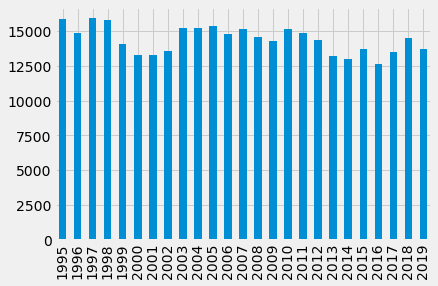

In [87]:
data.yr_adminst.value_counts(sort=False).plot.bar()

In [35]:
data.has_siblings.value_counts()

Yes        222491
No         108287
Unknown     29032
Name: has_siblings, dtype: int64

<AxesSubplot:>

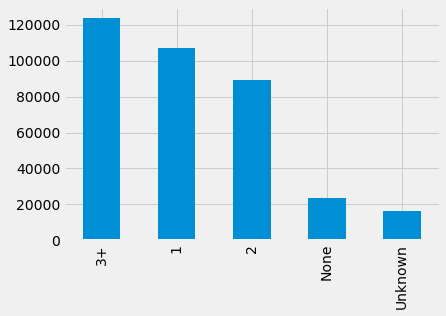

In [10]:
data.siblings.value_counts().plot.bar()

<AxesSubplot:>

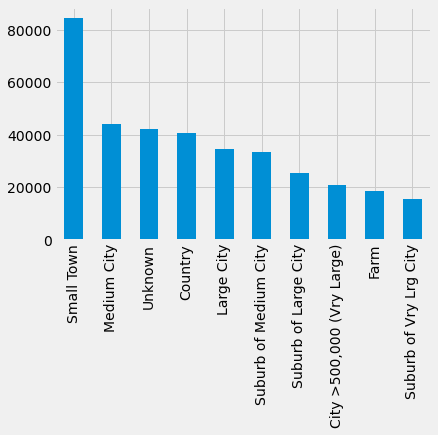

In [11]:
data.area_type.value_counts().plot.bar()

<AxesSubplot:>

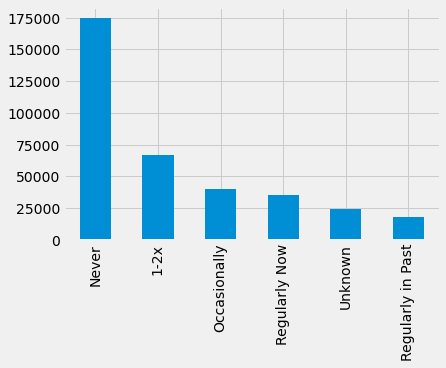

In [12]:
data.evr_smoked_cig.value_counts().plot.bar()

<AxesSubplot:>

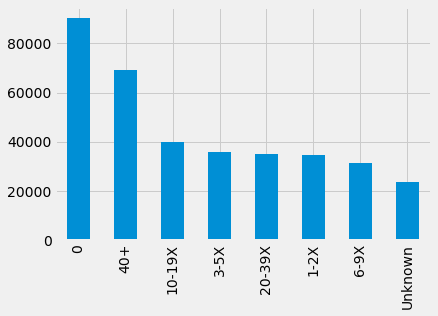

In [14]:
data.alcohol_lifetime_freq.value_counts().plot.bar()

<AxesSubplot:>

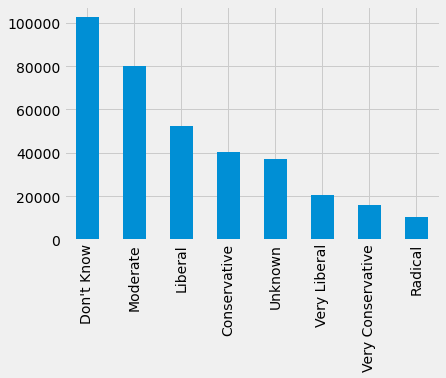

In [28]:
data.political_value_type.value_counts().plot.bar()

<AxesSubplot:>

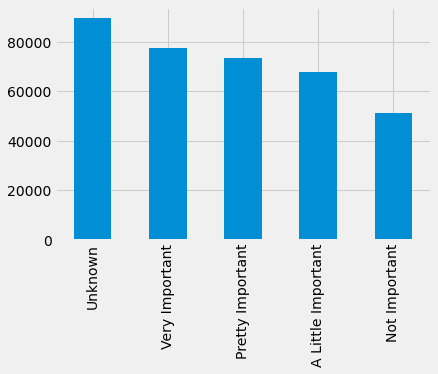

In [27]:
data.relig_importance.value_counts().plot.bar()

<AxesSubplot:>

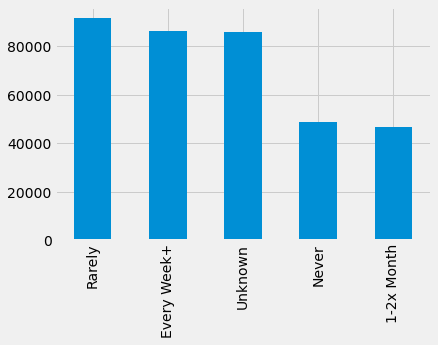

In [26]:
data.relig_attd.value_counts().plot.bar()

<AxesSubplot:>

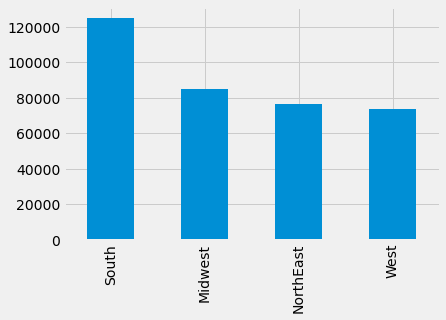

In [24]:
data.region.value_counts().plot.bar()

<AxesSubplot:>

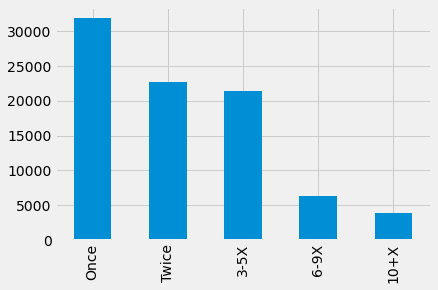

In [22]:
data.alcohol_2weeks.value_counts().iloc[2:].plot.bar()

<AxesSubplot:>

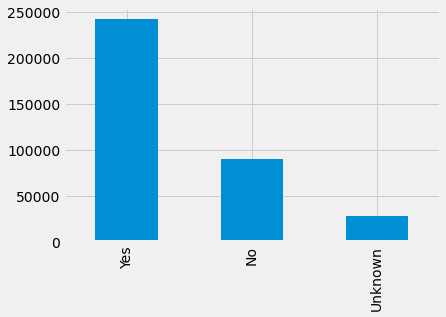

In [20]:
data.has_father.value_counts().plot.bar()

<AxesSubplot:>

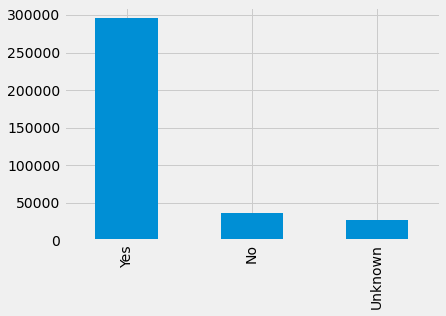

In [17]:
data.has_mother.value_counts().plot.bar()

<AxesSubplot:>

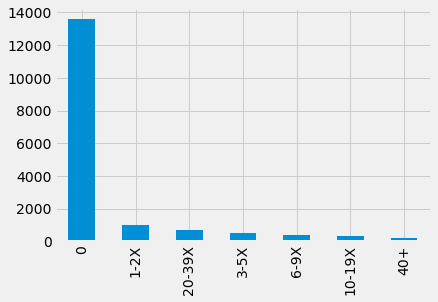

In [16]:
data.vape_marj_yr_freq.value_counts().iloc[1:].plot.bar()

<AxesSubplot:>

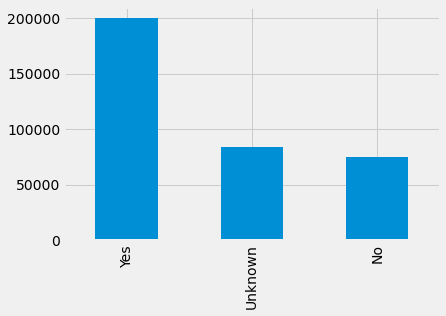

In [13]:
data.evr_drink.value_counts().plot.bar()

<AxesSubplot:>

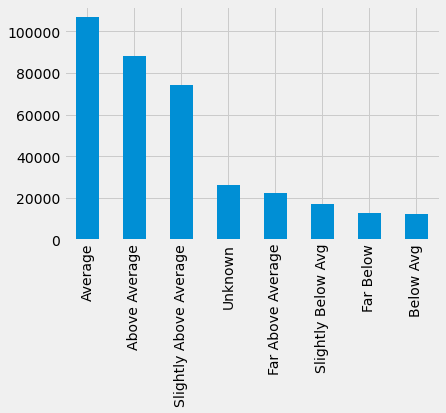

In [10]:
data.academic_self_rating.value_counts().plot.bar()

<AxesSubplot:>

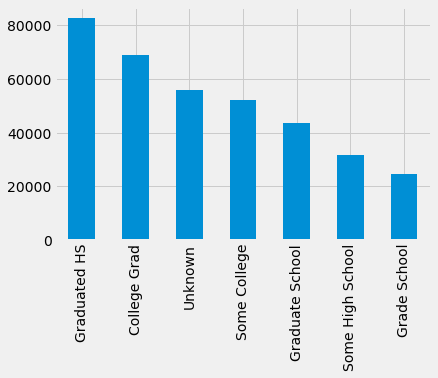

In [9]:
data.father_educ_lvl.value_counts().plot.bar()

## Modeling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
# for col in data.columns:
#     print(col)
#     print(data[col].value_counts())

In [10]:
conds = [(data['weed_hash_lifetime_freq']=='0'), ((data['weed_hash_lifetime_freq']!='0')&(data['weed_hash_lifetime_freq']!='Unknown')),
        (data['weed_hash_lifetime_freq']=='Unknown')]

labels = [0, 1, 'Unknown']

data['binary_weed'] = np.select(conds, labels)

<AxesSubplot:>

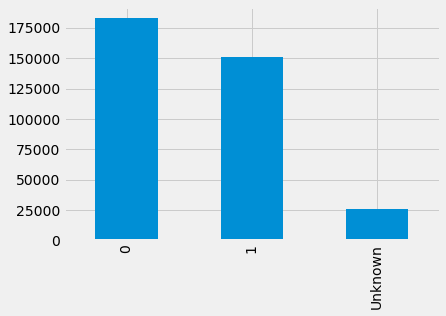

In [8]:
# Class distribution
data.binary_weed.value_counts().plot.bar()

### FSM

In [14]:
feature_mask = ['yr_adminst', 'sampling_weight', 'msa', 'siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 'binary_weed']

model_data_base = data[feature_mask]

In [22]:
ind_to_drop = []

for col in model_data_base.columns[2:]:
    
    for i in range(len(model_data_base[col])):
        if model_data_base[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [24]:
model_data_base.drop(labels=ind_to_drop, inplace=True)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
model_data_base.binary_weed.value_counts()

0    99780
1    83471
Name: binary_weed, dtype: int64

In [25]:
model_data_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183251 entries, 2660 to 359808
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yr_adminst            183251 non-null  int64  
 1   sampling_weight       183251 non-null  float64
 2   msa                   183251 non-null  int64  
 3   siblings              183251 non-null  object 
 4   evr_drink             183251 non-null  object 
 5   has_father            183251 non-null  object 
 6   father_educ_lvl       183251 non-null  object 
 7   mother_educ_lvl       183251 non-null  object 
 8   mother_employed       183251 non-null  object 
 9   academic_self_rating  183251 non-null  object 
 10  relig_importance      183251 non-null  object 
 11  binary_weed           183251 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 18.2+ MB


In [31]:
X = model_data_base.drop(labels='binary_weed', axis=1)
y = model_data_base.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [38]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [40]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [42]:
y_train.value_counts()

0    74910
1    62528
Name: binary_weed, dtype: int64

In [43]:
len(X_train_pp)==len(y_train)

True

In [93]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train_pp, y_train.astype(int))

LogisticRegression(max_iter=10000)

In [49]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score

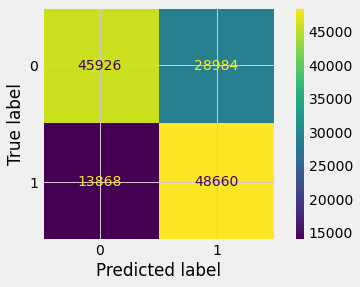

In [50]:
plot_confusion_matrix(lr, X_train_pp, y_train)

In [51]:
y_pred_tr = lr.predict(X_train_pp)

In [52]:
accuracy_score(y_train, y_pred_tr)

0.6882085012878534

In [59]:
recall_score(y_train, y_pred_tr, pos_label='1')

0.778211361310133

In [98]:
# Should we drop first??
features = dict(zip(X_train_pp.columns, lr.coef_[0]))
features

{'x0_1995': -0.21843045570889041,
 'x0_1996': -0.0721722846370278,
 'x0_1997': -0.023301990035663047,
 'x0_1998': 0.04783751479735095,
 'x0_1999': 0.07268543736593275,
 'x0_2000': 0.006422189041409775,
 'x0_2001': 0.026190382757349195,
 'x0_2002': 0.0860530581775514,
 'x0_2003': -0.0011966528241819875,
 'x0_2004': 0.013544712695638969,
 'x0_2005': 0.05468680919882253,
 'x0_2006': -0.04976941813015859,
 'x0_2007': -0.08514543527721831,
 'x0_2008': -0.07483510269569651,
 'x0_2009': -0.15076713586491597,
 'x0_2010': -0.027135937719623117,
 'x0_2011': 0.057399505784986524,
 'x0_2012': 0.01844948753913798,
 'x0_2013': 0.9515715273789876,
 'x0_2014': 0.16103337553021255,
 'x0_2015': 0.11404052717648024,
 'x0_2016': 0.12688114197674807,
 'x0_2017': 0.21605494227753588,
 'x0_2018': -1.6554849686706843,
 'x0_2019': 0.21036809948451946,
 'x1_0': -0.1116669431268713,
 'x1_1': -0.08335372725455444,
 'x2_1': -0.10513634893459292,
 'x2_2': -0.025250346462016345,
 'x2_3+': 0.0954585030072335,
 'x2_No

***********
### 2nd Model: Logistic Regression

In [99]:
feature_mask = ['sampling_weight', 'has_siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'academic_self_rating', 'avg_grade', 'relig_importance', 'area_type', 'binary_weed']

model2 = data[feature_mask]


In [100]:
model2.head()

,sampling_weight,has_siblings,evr_drink,has_father,father_educ_lvl,academic_self_rating,avg_grade,relig_importance,area_type,binary_weed
0,0.6,Yes,Unknown,No,Graduated HS,Average,B+,A Little Important,Medium City,0
1,0.6,No,Unknown,No,Some High School,Far Above Average,B+,Not Important,Small Town,1
2,0.9,Yes,Unknown,Yes,Some College,Average,C,Not Important,Small Town,1
3,0.6,Yes,Unknown,Yes,Graduated HS,Average,B+,Pretty Important,Unknown,0
4,0.9,No,Unknown,Yes,College Grad,Average,C,Very Important,Small Town,0


In [101]:
ind_to_drop = []

for col in model2.columns[1:]:
    
    for i in range(len(model2[col])):
        if model2[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [102]:
model2.drop(labels=ind_to_drop, inplace=True)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [103]:
model2.binary_weed.value_counts()

0    93958
1    77903
Name: binary_weed, dtype: int64

In [104]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171861 entries, 2660 to 359808
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sampling_weight       171861 non-null  float64
 1   has_siblings          171861 non-null  object 
 2   evr_drink             171861 non-null  object 
 3   has_father            171861 non-null  object 
 4   father_educ_lvl       171861 non-null  object 
 5   academic_self_rating  171861 non-null  object 
 6   avg_grade             171861 non-null  object 
 7   relig_importance      171861 non-null  object 
 8   area_type             171861 non-null  object 
 9   binary_weed           171861 non-null  object 
dtypes: float64(1), object(9)
memory usage: 14.4+ MB


In [105]:
X = model2.drop(labels='binary_weed', axis=1)
y = model2.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [106]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [107]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [108]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [109]:
y_train.value_counts()

0    70408
1    58487
Name: binary_weed, dtype: int64

In [110]:
len(X_train_pp)==len(y_train)

True

In [111]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train_pp, y_train.astype(int))

LogisticRegression(max_iter=10000)

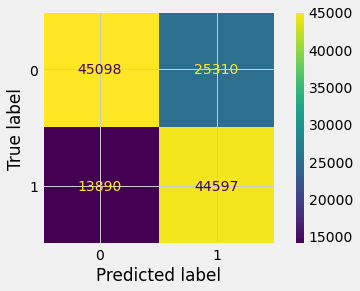

In [112]:
plot_confusion_matrix(lr, X_train_pp, y_train.astype(int))

In [113]:
y_pred_tr = lr.predict(X_train_pp)

In [115]:
accuracy_score(y_train.astype(int), y_pred_tr)

0.6958764886147639

In [116]:
recall_score(y_train.astype(int), y_pred_tr)

0.7625113273035034

In [135]:
lrgs = LogisticRegression()

grid2 = {'C': [0.01, 0.1, 0.5, 1], 'max_iter': [10000, 100000, 1000000]}

In [136]:
gs = GridSearchCV(lrgs, grid2)

In [137]:
gs.fit(X_train_pp, y_train.astype(int))

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'max_iter': [10000, 100000, 1000000]})

In [138]:
gs.best_estimator_

LogisticRegression(C=0.1, max_iter=10000)

In [150]:
bp = gs.best_params_
bp['penalty'] = 'elasticnet'
bp['solver'] = 'saga'
bp['l1_ratio'] = 0.3

In [151]:
lr = LogisticRegression(**bp)

lr.fit(X_train_pp, y_train.astype(int))

LogisticRegression(C=0.1, l1_ratio=0.3, max_iter=10000, penalty='elasticnet',
                   solver='saga')

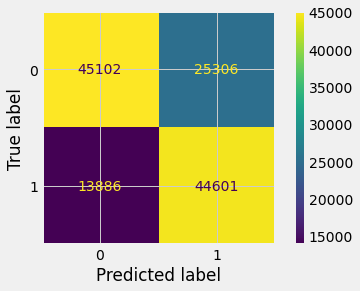

In [152]:
plot_confusion_matrix(lr, X_train_pp, y_train.astype(int))

In [153]:
y_pred2 = lr.predict(X_train_pp)

In [154]:
accuracy_score(y_train.astype(int), y_pred2)

0.6959385546374957

In [155]:
recall_score(y_train.astype(int), y_pred2)

0.7625797185699387

### 3rd Model: SGD Classifier

In [156]:
from sklearn.linear_model import SGDClassifier

In [158]:
feature_mask = ['yr_adminst', 'sampling_weight', 'area_type', 'evr_drink', 'has_father', 'father_educ_lvl',
               'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 'binary_weed']

model3 = data[feature_mask]

In [159]:
ind_to_drop = []

for col in model3.columns[2:]:
    
    for i in range(len(model3[col])):
        if model3[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [160]:
model3.drop(labels=ind_to_drop, inplace=True)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
model3.binary_weed.value_counts()

0    93419
1    77772
Name: binary_weed, dtype: int64

In [162]:
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171191 entries, 2660 to 359808
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yr_adminst            171191 non-null  int64  
 1   sampling_weight       171191 non-null  float64
 2   area_type             171191 non-null  object 
 3   evr_drink             171191 non-null  object 
 4   has_father            171191 non-null  object 
 5   father_educ_lvl       171191 non-null  object 
 6   mother_educ_lvl       171191 non-null  object 
 7   mother_employed       171191 non-null  object 
 8   academic_self_rating  171191 non-null  object 
 9   relig_importance      171191 non-null  object 
 10  binary_weed           171191 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 15.7+ MB


In [163]:
X = model3.drop(labels='binary_weed', axis=1)
y = model3.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [164]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [165]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [166]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [167]:
y_train.value_counts()

0    70028
1    58365
Name: binary_weed, dtype: int64

In [168]:
len(X_train_pp)==len(y_train)

True

In [169]:
sgd = SGDClassifier(max_iter=10000)

In [170]:
sgd.fit(X_train_pp, y_train.astype(int))

SGDClassifier(max_iter=10000)

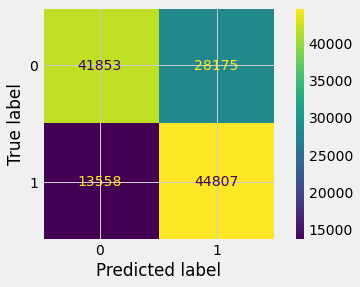

In [171]:
plot_confusion_matrix(sgd, X_train_pp, y_train.astype(int))

In [172]:
sgd_pred = sgd.predict(X_train_pp)

In [173]:
accuracy_score(y_train.astype(int), sgd_pred)

0.6749589152056577

In [174]:
recall_score(y_train.astype(int), sgd_pred)

0.7677032468088751

### Model #4: Logistic Regression

In [11]:
feature_mask = ['yr_adminst', 'sampling_weight', 'region', 'siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'age', 'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 
                'political_party', 'relig_attd', 'school_missed_ditched', 'skipped_class',
                'avg_grade', '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 
                'work_hrs', 'work_pay','other_income', 'rec_time', '12mo_r_tcktd','binary_weed']

model4 = data[feature_mask]

In [12]:
ind_to_drop = []

for col in model4.columns[2:]:
    
    for i in range(len(model4[col])):
        if model4[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [13]:
model4.drop(labels=ind_to_drop, inplace=True)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
model4.binary_weed.value_counts()

0    67477
1    55561
Name: binary_weed, dtype: int64

In [15]:
model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123038 entries, 2983 to 359808
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   yr_adminst             123038 non-null  int64  
 1   sampling_weight        123038 non-null  float64
 2   region                 123038 non-null  object 
 3   siblings               123038 non-null  object 
 4   evr_drink              123038 non-null  object 
 5   has_father             123038 non-null  object 
 6   father_educ_lvl        123038 non-null  object 
 7   age                    123038 non-null  object 
 8   sex                    123038 non-null  object 
 9   mother_educ_lvl        123038 non-null  object 
 10  mother_employed        123038 non-null  object 
 11  academic_self_rating   123038 non-null  object 
 12  relig_importance       123038 non-null  object 
 13  political_party        123038 non-null  object 
 14  relig_attd             123038 non

In [16]:
X = model4.drop(labels='binary_weed', axis=1)
y = model4.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [18]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [19]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [20]:
y_train.value_counts()

0    50530
1    41748
Name: binary_weed, dtype: int64

In [21]:
len(X_train_pp)==len(y_train)

True

In [22]:
lr = LogisticRegression(max_iter=10000, C=0.1)

lr.fit(X_train_pp, y_train.astype(int))

LogisticRegression(C=0.1, max_iter=10000)

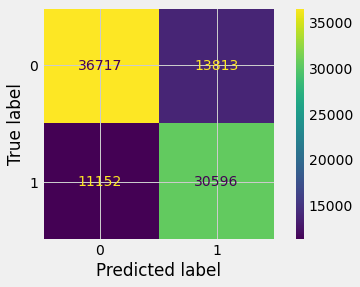

In [23]:
plot_confusion_matrix(lr, X_train_pp, y_train.astype(int))

In [24]:
y_pred_tr = lr.predict(X_train_pp)

In [26]:
accuracy_score(y_train.astype(int), y_pred_tr)

0.7294588092503088

In [27]:
recall_score(y_train.astype(int), y_pred_tr)

0.7328734310625659

In [33]:
X_train_pp.columns

Index(['x0_1995', 'x0_1996', 'x0_1997', 'x0_1998', 'x0_1999', 'x0_2000',
       'x0_2001', 'x0_2002', 'x0_2003', 'x0_2004',
       ...
       'x23_3', 'x23_4-5', 'x23_6-7', 'x23_<1', 'x24_0', 'x24_1', 'x24_2',
       'x24_3', 'x24_4+', 'sampling_weight'],
      dtype='object', length=148)

In [37]:
X_train_pp.columns[1].split('_')

['x0', '1996']

In [ ]:
cols4 = model4.drop(labels='sampling_weight', axis=1).columns

In [54]:
labeled_cols = []
for i in range(len(X_train_pp.columns)-1):
    ind = X_train_pp.columns[i].split('_')[0]
    col = X_train_pp.columns[i]
    
    if ind == X_train_pp.columns[i].split('_')[0]:
        labeled_cols.append(cols4[int(ind[1:])]+col)

In [56]:
labeled_cols.append('sampling_weight')
labeled_cols

['yr_adminstx0_1995',
 'yr_adminstx0_1996',
 'yr_adminstx0_1997',
 'yr_adminstx0_1998',
 'yr_adminstx0_1999',
 'yr_adminstx0_2000',
 'yr_adminstx0_2001',
 'yr_adminstx0_2002',
 'yr_adminstx0_2003',
 'yr_adminstx0_2004',
 'yr_adminstx0_2005',
 'yr_adminstx0_2006',
 'yr_adminstx0_2007',
 'yr_adminstx0_2008',
 'yr_adminstx0_2009',
 'yr_adminstx0_2010',
 'yr_adminstx0_2011',
 'yr_adminstx0_2012',
 'yr_adminstx0_2014',
 'yr_adminstx0_2015',
 'yr_adminstx0_2016',
 'yr_adminstx0_2017',
 'yr_adminstx0_2019',
 'regionx1_Midwest',
 'regionx1_NorthEast',
 'regionx1_South',
 'regionx1_West',
 'siblingsx2_1',
 'siblingsx2_2',
 'siblingsx2_3+',
 'siblingsx2_None',
 'evr_drinkx3_No',
 'evr_drinkx3_Yes',
 'has_fatherx4_No',
 'has_fatherx4_Yes',
 'father_educ_lvlx5_College Grad',
 'father_educ_lvlx5_Grade School',
 'father_educ_lvlx5_Graduate School',
 'father_educ_lvlx5_Graduated HS',
 'father_educ_lvlx5_Some College',
 'father_educ_lvlx5_Some High School',
 'agex6_18+',
 'agex6_< 18',
 'sexx7_Female'

In [57]:
# Should we drop first??
features = dict(zip(labeled_cols, lr.coef_[0]))
features

{'yr_adminstx0_1995': -0.05718518028556793,
 'yr_adminstx0_1996': -0.06814504626174438,
 'yr_adminstx0_1997': -0.15563375467816354,
 'yr_adminstx0_1998': -0.15536547870396525,
 'yr_adminstx0_1999': -0.034784010459958416,
 'yr_adminstx0_2000': -0.13681509391406804,
 'yr_adminstx0_2001': -0.0688042631448565,
 'yr_adminstx0_2002': -0.00626239630783327,
 'yr_adminstx0_2003': -0.08105648015701997,
 'yr_adminstx0_2004': -0.09154750257806624,
 'yr_adminstx0_2005': -0.04223050426713887,
 'yr_adminstx0_2006': -0.10884106339935383,
 'yr_adminstx0_2007': -0.13984384471796552,
 'yr_adminstx0_2008': -0.18786570818991954,
 'yr_adminstx0_2009': -0.166338957624828,
 'yr_adminstx0_2010': -0.041329989936501534,
 'yr_adminstx0_2011': 0.11222897069801416,
 'yr_adminstx0_2012': 0.09962519571319978,
 'yr_adminstx0_2014': 0.29597219599991603,
 'yr_adminstx0_2015': 0.3316652975075811,
 'yr_adminstx0_2016': 0.33471064199706274,
 'yr_adminstx0_2017': -0.08543342718241319,
 'yr_adminstx0_2019': 0.456413154664671

In [ ]:
def top_negative_coefs(feature_names, coefs):
    if len(feature_names) != len(coefs):
        print('stop right there: length of feature names list must equal length of coef list')
    
    inds = [i for i in range(len(coefs))]
    zipped_names = dict(zip(inds, coefs))
    zipped_coefs = dict(zip(inds, feature_names))
    sorted_coefs = sorted(coefs, reverse=True)
    
    for i in range(len(inds)):
        if zipped_coefs[i]==

### Model #5: Logistic - subsetting for years 2012-2019

In [71]:
feature_mask = ['yr_adminst', 'sampling_weight', 'region', 'siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'age', 'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 
                'political_party', 'relig_attd', 'school_missed_ditched', 'skipped_class',
                'avg_grade', '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 
                'work_hrs', 'work_pay','other_income', 'rec_time', '12mo_r_tcktd','binary_weed']

model_mask = data[feature_mask]
model5 = model_mask[model_mask['yr_adminst']>=2012].reset_index()

In [72]:
model5.head()

,index,yr_adminst,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd,binary_weed
0,251205,2012,1.010270,South,1,Unknown,Yes,Some College,18+,Female,College Grad,Yes/Nearly All,Unknown,Very Important,Independent,Every Week+,0,Unknown,A+,Definitely Will,Yes,No,21-25,76-125,21-35,3,1,0
1,251206,2012,1.007380,South,2,Unknown,No,Graduated HS,< 18,Male,Graduated HS,Yes/Nearly All,Far Above Average,Very Important,Don't Know,Rarely,0,0,B-,Definitely Won't,No,Yes,0,0,51-75,<1,0,1
2,251207,2012,1.090067,South,3+,Unknown,No,Graduated HS,< 18,Female,Graduated HS,Yes/Some,Average,A Little Important,Unknown,1-2x Month,1,1-2,B-,Definitely Won't,No,No,6-10,0,76-125,4-5,Unknown,0
3,251208,2012,1.007469,South,3+,Unknown,No,Graduated HS,< 18,Female,Graduated HS,Yes/Most,Slightly Above Average,A Little Important,Independent,Rarely,1,0,B,Probably Won't,No,No,26-30,76-125,0,3,0,1
4,251209,2012,0.979325,South,3+,Unknown,No,Graduated HS,18+,Male,Graduated HS,Yes/Some,Slightly Above Average,Pretty Important,Strong Democrat,Rarely,0,0,A-,Definitely Will,Yes,No,16-20,Unknown,Unknown,2,Unknown,0


In [73]:
ind_to_drop = []

for col in model5.columns[2:]:
    
    for i in range(len(model5)):
        if model5[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [74]:
model5.drop(labels=ind_to_drop, inplace=True)

In [75]:
model5.binary_weed.value_counts()

0    15864
1    12441
Name: binary_weed, dtype: int64

In [76]:
model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28305 entries, 2379 to 108603
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  28305 non-null  int64  
 1   yr_adminst             28305 non-null  int64  
 2   sampling_weight        28305 non-null  float64
 3   region                 28305 non-null  object 
 4   siblings               28305 non-null  object 
 5   evr_drink              28305 non-null  object 
 6   has_father             28305 non-null  object 
 7   father_educ_lvl        28305 non-null  object 
 8   age                    28305 non-null  object 
 9   sex                    28305 non-null  object 
 10  mother_educ_lvl        28305 non-null  object 
 11  mother_employed        28305 non-null  object 
 12  academic_self_rating   28305 non-null  object 
 13  relig_importance       28305 non-null  object 
 14  political_party        28305 non-null  object 
 15

In [77]:
X = model5.drop(labels='binary_weed', axis=1)
y = model5.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
X_test.head()

,index,yr_adminst,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd
94914,346119,2019,0.951333,Midwest,2,No,Yes,College Grad,< 18,Male,College Grad,Yes/Some,Far Above Average,Not Important,Independent,Rarely,0,0,A-,Definitely Will,Yes,No,11-15,51-75,21-35,2,0
107722,358927,2019,0.535988,Midwest,1,Yes,Yes,Some College,< 18,Female,College Grad,Yes/Nearly All,Average,Not Important,Mild Republican,Never,0,0,B+,Definitely Will,Yes,No,16-20,51-75,0,2,0
99754,350959,2019,1.285705,South,2,No,Yes,Graduate School,18+,Female,Graduate School,Yes/Some,Above Average,Pretty Important,Don't Know,Rarely,0,0,A+,Definitely Will,Yes,No,11-15,0,0,<1,2
46415,297620,2015,0.829008,South,3+,Yes,Yes,Graduated HS,< 18,Male,Graduated HS,Yes/Some,Above Average,Very Important,Mild Republican,Every Week+,0,0,A-,Definitely Will,Yes,No,16-20,176+,126-175,2,0
33633,284838,2014,0.484160,NorthEast,1,Yes,Yes,Some College,< 18,Female,Graduated HS,Yes/Nearly All,Average,A Little Important,Don't Know,Rarely,0,0,B+,Probably Won't,No,No,21-25,76-125,0,3,0


In [82]:
X_train.head()

,index,yr_adminst,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd
105801,357006,2019,1.893301,NorthEast,None,Yes,Yes,Graduate School,18+,Female,Graduate School,Yes/Nearly All,Above Average,Not Important,Strong Democrat,Never,0,1-2,A+,Definitely Will,Yes,No,6-10,76-125,0,<1,0
44885,296090,2015,1.061726,South,3+,Yes,Yes,Grade School,18+,Male,Grade School,No,Above Average,Pretty Important,Don't Know,Rarely,0,0,A+,Probably Will,Yes,No,11-15,76-125,0,2,2
45088,296293,2015,2.218177,South,1,No,No,Some College,< 18,Male,Some College,Yes/Nearly All,Below Avg,Not Important,No Pref,Rarely,1,1-2,D,Probably Won't,Yes,No,5 or less,36-50,11-20,3,0
105896,357101,2019,0.921620,Midwest,2,Yes,No,Graduated HS,< 18,Male,College Grad,Yes/Most,Far Above Average,Not Important,Mild Democrat,Every Week+,0,0,A+,Definitely Will,Yes,No,6-10,51-75,0,2,0
95704,346909,2019,1.044207,South,1,Yes,Yes,Graduated HS,18+,Male,College Grad,Yes/Some,Slightly Above Average,Pretty Important,Strong Republican,Rarely,1,0,A-,Definitely Will,Yes,No,0,0,11-20,2,0


In [83]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels=['sampling_weight', 'index'], axis=1)
X_te_cat = X_test.drop(labels=['sampling_weight', 'index'], axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [84]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [85]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [86]:
y_train.value_counts()

0    11906
1     9322
Name: binary_weed, dtype: int64

In [87]:
len(X_train_pp)==len(y_train)

True

In [88]:
lr5 = LogisticRegression(max_iter=10000, C=0.1)

lr5.fit(X_train_pp, y_train.astype(int))

LogisticRegression(C=0.1, max_iter=10000)

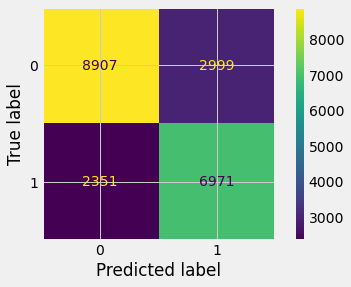

In [89]:
plot_confusion_matrix(lr5, X_train_pp, y_train.astype(int))

In [90]:
y_pred_tr = lr5.predict(X_train_pp)

In [91]:
accuracy_score(y_train.astype(int), y_pred_tr)

0.7479743734690032

In [92]:
recall_score(y_train.astype(int), y_pred_tr)

0.7478009010941858

### Model #5 - Logistic, subsetting for 1995-2005

In [93]:
feature_mask = ['yr_adminst', 'sampling_weight', 'region', 'siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'age', 'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 
                'political_party', 'relig_attd', 'school_missed_ditched', 'skipped_class',
                'avg_grade', '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 
                'work_hrs', 'work_pay','other_income', 'rec_time', '12mo_r_tcktd','binary_weed']

model_mask = data[feature_mask]
model6 = model_mask[model_mask['yr_adminst']<=2005].reset_index(drop=True)

In [94]:
model6.head()

,yr_adminst,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd,binary_weed
0,1995,0.6,Midwest,1,Unknown,No,Graduated HS,Unknown,Male,College Grad,Yes/Nearly All,Average,A Little Important,Don't Know,Rarely,0,0,B+,Definitely Will,No,No,30+,126-175,0,4-5,0,0
1,1995,0.6,West,2,Unknown,No,Some High School,Unknown,Male,Graduated HS,Yes/Some,Far Above Average,Not Important,Independent,Never,6-10,6-10,B+,Probably Will,No,Yes,5 or less,21-35,126-175,<1,0,1
2,1995,0.9,Midwest,1,Unknown,Yes,Some College,Unknown,Unknown,Graduated HS,Yes/Nearly All,Average,Not Important,Strong Republican,Never,3,1-2,C,Definitely Won't,No,No,6-10,76-125,0,2,0,1
3,1995,0.6,South,3+,Unknown,Yes,Graduated HS,Unknown,Female,Graduated HS,Yes/Some,Average,Pretty Important,Independent,Every Week+,0,0,B+,Definitely Will,Yes,No,21-25,51-75,0,1,0,0
4,1995,0.9,Midwest,None,Unknown,Yes,College Grad,Unknown,Male,Graduate School,Yes/Most,Average,Very Important,No Pref,Every Week+,0,0,C,Definitely Will,Yes,No,16-20,76-125,36-50,2,0,0


In [95]:
ind_to_drop = []

for col in model6.columns[2:]:
    
    for i in range(len(model6)):
        if model6[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [96]:
model6.drop(labels=ind_to_drop, inplace=True)

In [97]:
model6.binary_weed.value_counts()

0    29179
1    25857
Name: binary_weed, dtype: int64

In [98]:
model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55036 entries, 2983 to 162118
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr_adminst             55036 non-null  int64  
 1   sampling_weight        55036 non-null  float64
 2   region                 55036 non-null  object 
 3   siblings               55036 non-null  object 
 4   evr_drink              55036 non-null  object 
 5   has_father             55036 non-null  object 
 6   father_educ_lvl        55036 non-null  object 
 7   age                    55036 non-null  object 
 8   sex                    55036 non-null  object 
 9   mother_educ_lvl        55036 non-null  object 
 10  mother_employed        55036 non-null  object 
 11  academic_self_rating   55036 non-null  object 
 12  relig_importance       55036 non-null  object 
 13  political_party        55036 non-null  object 
 14  relig_attd             55036 non-null  object 
 15

In [99]:
X = model6.drop(labels='binary_weed', axis=1)
y = model6.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [100]:
X_test.head()

,yr_adminst,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd
57968,1998,0.6740,South,2,Yes,Yes,Graduated HS,18+,Male,Graduated HS,Yes/Most,Average,A Little Important,Don't Know,Every Week+,2,1-2,C+,Probably Won't,Yes,No,26-30,126-175,11-20,3,0
110258,2002,0.3335,South,1,Yes,Yes,Graduate School,18+,Male,Graduated HS,Yes/Nearly All,Average,Not Important,Don't Know,Never,0,0,B-,Definitely Will,Yes,No,16-20,51-75,11-20,3,1
148444,2005,1.7473,Midwest,2,Yes,Yes,Graduated HS,18+,Male,College Grad,Yes/Some,Slightly Above Average,A Little Important,Mild Democrat,Rarely,0,1-2,A-,Definitely Will,Yes,No,16-20,126-175,0,<1,1
127471,2003,1.4510,Midwest,3+,Yes,Yes,Graduated HS,< 18,Female,Graduated HS,No,Slightly Above Average,Pretty Important,Strong Republican,1-2x Month,4-5,0,B,Definitely Will,Yes,No,21-25,126-175,0,3,0
155563,2005,0.6192,NorthEast,1,No,Yes,College Grad,18+,Female,College Grad,Yes/Most,Average,Very Important,Mild Republican,Every Week+,0,0,A+,Definitely Will,Yes,No,16-20,51-75,11-20,3,1


In [101]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [102]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [103]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [104]:
y_train.value_counts()

0    21909
1    19368
Name: binary_weed, dtype: int64

In [105]:
len(X_train_pp)==len(y_train)

True

In [106]:
lr6 = LogisticRegression(max_iter=10000, C=0.1)

lr6.fit(X_train_pp, y_train.astype(int))

LogisticRegression(C=0.1, max_iter=10000)

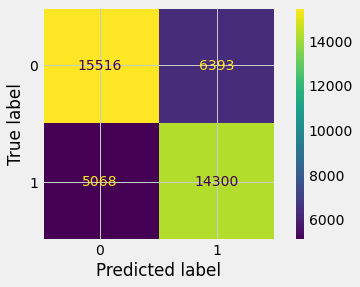

In [107]:
plot_confusion_matrix(lr6, X_train_pp, y_train.astype(int))

In [108]:
y_pred_tr = lr6.predict(X_train_pp)

In [109]:
accuracy_score(y_train.astype(int), y_pred_tr)

0.7223393172953461

In [110]:
recall_score(y_train.astype(int), y_pred_tr)

0.738331268071045

### Model 7: Logistic Regression - NEW TARGET - Num Drugs Used in Lifetime

In [10]:
drug_cols = ['weed_hash_lifetime_freq', 'lsd_lifetime_freq', 'pysd_lifetime_freq',
             'coke_lifetime_freq', 'amph_lifetime_freq', 'meth_lifetime_freq',
             'sedbarb_lifetime_freq', 'tranq_lifetime_freq', 'heroin_lifetime_freq', 
             'narcotic_lifetime_freq', 'inhal_lifetime_freq', 'mdma_lifetime_freq', 'pcp_lifetime_freq']

feature_mask = ['yr_adminst', 'sampling_weight', 'region', 'siblings', 'evr_drink', 
                'has_father', 'father_educ_lvl', 'alcohol_yr_freq', 'alcohol_month_freq',
               'age', 'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 
                'political_party', 'relig_attd', 'school_missed_ditched', 'skipped_class',
                'avg_grade', '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 
                'work_hrs', 'work_pay','other_income', 'rec_time', '12mo_r_tcktd','12mo_accidents']

model7 = data[feature_mask]

In [11]:
for col in drug_cols:
    
    conds = [((data[col] == '0')|(data[col] == 0)),
             ((data[col] != '0')&(data[col] != 0)&(data[col] != 'Unknown')),
            (data[col] == 'Unknown')]
    choices = [0,1, 'Unknown']
    
    model7[col] = np.select(conds, choices)
    print(model7[col].value_counts(), '\n\n')
        

0          182906
1          151214
Unknown     25690
Name: weed_hash_lifetime_freq, dtype: int64 


0          311694
Unknown     25113
1           23003
Name: lsd_lifetime_freq, dtype: int64 


0          310539
Unknown     26351
1           22920
Name: pysd_lifetime_freq, dtype: int64 


0          320785
1           21260
Unknown     17765
Name: coke_lifetime_freq, dtype: int64 


0          297795
1           42516
Unknown     19499
Name: amph_lifetime_freq, dtype: int64 


Unknown    228049
0          126633
1            5128
Name: meth_lifetime_freq, dtype: int64 


0          302820
Unknown     30290
1           26700
Name: sedbarb_lifetime_freq, dtype: int64 


0          314656
1           28883
Unknown     16271
Name: tranq_lifetime_freq, dtype: int64 


0          338818
Unknown     16202
1            4790
Name: heroin_lifetime_freq, dtype: int64 


0          299830
1           33637
Unknown     26343
Name: narcotic_lifetime_freq, dtype: int64 


0          171238
Unknown 

In [12]:
ind_to_drop = []

for col in model7.columns[2:]:
    
    for i in range(len(model7)):
        if model7[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [13]:
model7.drop(labels=ind_to_drop, inplace=True)

In [14]:
model7.inhal_lifetime_freq.value_counts()

0    32208
1     4258
Name: inhal_lifetime_freq, dtype: int64

In [15]:
model7.weed_hash_lifetime_freq.dtype

dtype('O')

In [16]:
model7['num_drugs_lifetime'] = model7.weed_hash_lifetime_freq.astype(int)+model7.lsd_lifetime_freq.astype(int)+model7.pysd_lifetime_freq.astype(int)+model7.coke_lifetime_freq.astype(int)+model7.amph_lifetime_freq.astype(int)+model7.meth_lifetime_freq.astype(int)+model7.sedbarb_lifetime_freq.astype(int)+model7.tranq_lifetime_freq.astype(int)+model7.heroin_lifetime_freq.astype(int)+model7.narcotic_lifetime_freq.astype(int)+model7.inhal_lifetime_freq.astype(int)
        
        

In [17]:
drug_conds = [(model7['num_drugs_lifetime']==0),(model7['num_drugs_lifetime']!=0)]

drug_lbls = [0,1]

model7['drug_binary'] = np.select(drug_conds, drug_lbls) # 0 - 17525

In [18]:
new_feat_mask = ['sampling_weight', 'region', 'siblings', 'evr_drink', 
                'has_father', 'father_educ_lvl', 'alcohol_yr_freq', 'alcohol_month_freq',
               'age', 'sex', 'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 
                'political_party', 'relig_attd', 'school_missed_ditched', 'skipped_class',
                'avg_grade', '4yrcoll_after_hs', 'desire_4yrcoll', 'desire_none', 
                'work_hrs', 'work_pay','other_income', 'rec_time', '12mo_r_tcktd','12mo_accidents', 'drug_binary']

model7 = model7[new_feat_mask]
model7.head()

,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,alcohol_yr_freq,alcohol_month_freq,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd,12mo_accidents,drug_binary
2983,0.6,South,1,Yes,Yes,Graduate School,3-5X,1-5 Cigarettes,< 18,Female,Some College,No,Slightly Below Avg,A Little Important,No Pref,Rarely,0,0,C,Definitely Won't,No,No,16-20,51-75,76-125,6-7,1,1,1
4699,0.6,South,2,No,Yes,Graduate School,0,None,18+,Female,Graduate School,Yes/Most,Above Average,Very Important,Don't Know,Every Week+,0,1-2,B,Probably Will,Yes,No,11-15,76-125,1-5,1,2,1,0
4714,0.9,South,2,Yes,No,College Grad,0,None,18+,Female,Graduate School,Yes/Some,Slightly Above Average,Very Important,No Pref,Every Week+,0,0,A+,Probably Will,No,No,21-25,76-125,0,1,0,2,1
10587,0.9,South,3+,Yes,No,College Grad,40+,2+ Packs,18+,Male,College Grad,Yes/Nearly All,Average,Pretty Important,Don't Know,Every Week+,0,6-10,A-,Definitely Won't,No,Yes,30+,126-175,126-175,6-7,2,1,1
12714,0.9,West,2,Yes,No,Graduated HS,1-2X,<1 Cigarettes,18+,Female,Graduate School,Yes/Most,Above Average,Pretty Important,No Pref,Rarely,0,0,A-,Definitely Won't,Yes,No,16-20,0,126-175,1,0,0,0


In [20]:
model7.sampling_weight.min()

0.101055804518088

In [21]:
model7.sampling_weight.max()

7.3568

In [39]:
model7.phik_matrix()['drug_binary'].sort_values(ascending=False)

interval columns not set, guessing: ['sampling_weight', 'drug_binary']


drug_binary              1.000000
evr_drink                0.635299
alcohol_yr_freq          0.497066
alcohol_month_freq       0.431018
skipped_class            0.330341
relig_attd               0.330080
rec_time                 0.311969
relig_importance         0.299456
school_missed_ditched    0.240597
avg_grade                0.237333
work_hrs                 0.195982
4yrcoll_after_hs         0.191097
work_pay                 0.172315
12mo_r_tcktd             0.158116
other_income             0.137761
academic_self_rating     0.135577
has_father               0.125629
desire_4yrcoll           0.116796
12mo_accidents           0.106740
political_party          0.104916
sex                      0.085886
father_educ_lvl          0.076493
desire_none              0.071815
mother_educ_lvl          0.067540
region                   0.066160
mother_employed          0.063107
siblings                 0.052992
sampling_weight          0.027884
age                      0.010409
Name: drug_bin

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [32]:
X = model7.drop(labels='drug_binary', axis=1)
y = model7.drug_binary

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [153]:
X_test.head()

,sampling_weight,region,siblings,evr_drink,has_father,father_educ_lvl,alcohol_yr_freq,alcohol_month_freq,age,sex,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,political_party,relig_attd,school_missed_ditched,skipped_class,avg_grade,4yrcoll_after_hs,desire_4yrcoll,desire_none,work_hrs,work_pay,other_income,rec_time,12mo_r_tcktd,12mo_accidents
41497,0.6051,NorthEast,3+,Yes,Yes,Graduated HS,40+,1 Pack,< 18,Male,College Grad,Yes/Nearly All,Slightly Below Avg,A Little Important,Mild Republican,1-2x Month,0,0,B+,Definitely Will,Yes,No,21-25,126-175,6-10,<1,0,0
48870,3.5663,Midwest,1,Yes,No,College Grad,6-9X,1-5 Cigarettes,18+,Male,College Grad,Yes/Nearly All,Above Average,Pretty Important,Independent,Rarely,0,0,A-,Definitely Will,Yes,No,0,0,36-50,3,0,0
117462,1.7066,South,3+,No,Yes,College Grad,0,None,18+,Female,Grade School,Yes/Nearly All,Average,A Little Important,Don't Know,Rarely,0,0,C,Definitely Will,Yes,No,16-20,76-125,76-125,2,1,1
148444,1.7473,Midwest,2,Yes,Yes,Graduated HS,3-5X,None,18+,Male,College Grad,Yes/Some,Slightly Above Average,A Little Important,Mild Democrat,Rarely,0,1-2,A-,Definitely Will,Yes,No,16-20,126-175,0,<1,1,1
128992,0.6458,South,1,Yes,Yes,Graduate School,1-2X,None,< 18,Male,College Grad,Yes/Nearly All,Slightly Above Average,Pretty Important,No Pref,Rarely,0,0,B,Probably Will,Yes,No,16-20,76-125,0,3,1,1


In [34]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [35]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [36]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [37]:
y_train.value_counts()

1    14228
0    13121
Name: drug_binary, dtype: int64

In [38]:
len(X_train_pp)==len(y_train)

True

In [159]:
lr7 = LogisticRegression(max_iter=10000, C=0.1)

lr7.fit(X_train_pp, y_train.astype(int))

LogisticRegression(C=0.1, max_iter=10000)

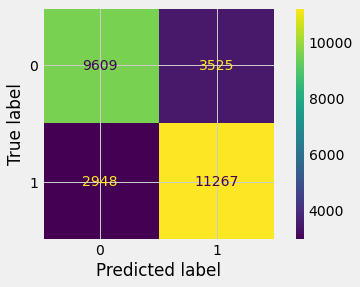

In [160]:
plot_confusion_matrix(lr7, X_train_pp, y_train.astype(int))

In [161]:
y_pred_tr = lr7.predict(X_train_pp)

In [162]:
accuracy_score(y_train.astype(int), y_pred_tr)

0.7633185856886906

In [163]:
recall_score(y_train.astype(int), y_pred_tr)

0.7926134365107281

********
#### Trying different models with same dataset

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [56]:
def kfold_validation(X_train, y_train, classifier, 
                     continuous_cols, categorical_cols):
   
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    val_recall = []
    val_prec = []
    val_acc = []
    roc_auc = []

    for train_ind, val_ind in skf.split(X_train, y_train):
        x_t = X_train.iloc[train_ind]
        y_t = y_train.iloc[train_ind]

        
        if len(continuous_cols)==0:
            
            ohe = OneHotEncoder(sparse=False)
            
            cat_cols = categorical_cols

            dummies = ohe.fit_transform(x_t[cat_cols])

            x_t = pd.DataFrame(dummies, columns=ohe.get_feature_names())
            
            x_val = X_train.iloc[val_ind]
            y_val = y_train.iloc[val_ind]
        
            dums = ohe.transform(x_val[cat_cols])

            x_val = pd.DataFrame(dums, columns=ohe.get_feature_names())

        elif len(continuous_cols!=0):
            
            ss = StandardScaler()
            ohe = OneHotEncoder(sparse=False)

            cont = continuous_cols
            cat_cols = categorical_cols

            scaled = ss.fit_transform(x_t[cont])
            dummies = ohe.fit_transform(x_t[cat_cols])

            x_t = pd.concat([pd.DataFrame(scaled, columns=cont), 
                                      pd.DataFrame(dummies, columns=ohe.get_feature_names())], axis=1)
            
            x_val = X_train.iloc[val_ind]
            y_val = y_train.iloc[val_ind]
        
        
            sc = ss.transform(x_val[cont])
            dums = ohe.transform(x_val[cat_cols])

            x_val = pd.concat([pd.DataFrame(sc, columns=cont), 
                                  pd.DataFrame(dums, columns=ohe.get_feature_names())], axis=1)
        
        
            x_val = X_train.iloc[val_ind]
            y_val = y_train.iloc[val_ind]


            sc = ss.transform(x_val[cont])
            dums = ohe.transform(x_val[cat_cols])

            x_val = pd.concat([pd.DataFrame(sc, columns=cont), 
                                      pd.DataFrame(dums, columns=ohe.get_feature_names())], axis=1)
        
        clf = classifier

        clf.fit(x_t, y_t)

        val_recall.append(recall_score(y_val, clf.predict(x_val)))
        val_prec.append(precision_score(y_val, clf.predict(x_val)))
        val_acc.append(accuracy_score(y_val, clf.predict(x_val)))
        roc_auc.append(roc_auc_score(y_val, clf.predict(x_val)))
        
    return val_recall, val_prec, val_acc, roc_auc, clf

In [86]:
rf = RandomForestClassifier()

In [87]:
rec, prec, acc, roc_auc, clf = kfold_validation(X_train_pp, y_train.astype(int), rf, 
                                             ['sampling_weight'], 
                                                X_train_pp.drop('sampling_weight', axis=1).columns)

In [90]:
clf.base_estimator_

DecisionTreeClassifier()

In [88]:
acc

[0.753199268738574,
 0.7382084095063985,
 0.7594149908592321,
 0.7550274223034735,
 0.7477148080438757,
 0.746617915904936,
 0.7539305301645338,
 0.7542961608775137,
 0.7630712979890311,
 0.7659107534747622]

In [89]:
rec

[0.7990161630358398,
 0.7617709065354884,
 0.7884750527055516,
 0.7877723120168658,
 0.7898805340829234,
 0.7814476458186929,
 0.7926914968376669,
 0.7955024595924104,
 0.7946554149085795,
 0.8080168776371308]

In [82]:
lr = LogisticRegression(max_iter=10000, C=0.1)

In [83]:
rec, prec, acc, roc_auc, clf = kfold_validation(X_train_pp, y_train.astype(int), lr, 
                                             ['sampling_weight'], 
                                                X_train_pp.drop('sampling_weight', axis=1).columns)

In [84]:
rec

[0.7983134223471539,
 0.7666900913562895,
 0.786366830639494,
 0.7955024595924104,
 0.7884750527055516,
 0.7765284609978917,
 0.7779339423752635,
 0.7898805340829234,
 0.7939521800281294,
 0.7974683544303798]

In [85]:
acc

[0.7663619744058501,
 0.7550274223034735,
 0.7623400365630713,
 0.770018281535649,
 0.7568555758683729,
 0.7524680073126142,
 0.7535648994515539,
 0.7572212065813528,
 0.7722120658135283,
 0.7692026335040234]

In [45]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')

In [72]:
dtc = DecisionTreeClassifier()

In [73]:
dsgs = {'max_depth': [2,5,6],
       'min_weight_fraction_leaf': [0.2, 0.3, 0.5, None]}

In [74]:
dtgs = GridSearchCV(dtc, dsgs)

In [75]:
rec, prec, acc, roc_auc, clf = kfold_validation(X_train_pp, y_train.astype(int), dtgs, 
                                             ['sampling_weight'], 
                                                X_train_pp.drop('sampling_weight', axis=1).columns)

In [76]:
clf.best_score_

0.7163518179971562

In [77]:
clf.best_params_

{'max_depth': 2, 'min_weight_fraction_leaf': 0.2}

In [78]:
acc

[0.7206581352833638,
 0.7096892138939671,
 0.7276051188299817,
 0.7140767824497257,
 0.7049360146252285,
 0.7162705667276051,
 0.7173674588665447,
 0.7140767824497257,
 0.7224862888482633,
 0.7183613752743233]

In [79]:
rec

[0.707659873506676,
 0.6858749121574139,
 0.7125790583274771,
 0.6999297259311315,
 0.690794096978215,
 0.7069571328179901,
 0.6929023190442727,
 0.7132817990161631,
 0.7187060478199718,
 0.6940928270042194]

In [70]:
# GS Take 2
clf.best_params_

{'max_depth': 5, 'min_weight_fraction_leaf': 0.2}

In [71]:
clf.best_score_

0.7163518179971562

In [68]:
acc

[0.7206581352833638,
 0.7096892138939671,
 0.7276051188299817,
 0.7140767824497257,
 0.7049360146252285,
 0.7162705667276051,
 0.7173674588665447,
 0.7140767824497257,
 0.7224862888482633,
 0.7183613752743233]

In [69]:
rec

[0.707659873506676,
 0.6858749121574139,
 0.7125790583274771,
 0.6999297259311315,
 0.690794096978215,
 0.7069571328179901,
 0.6929023190442727,
 0.7132817990161631,
 0.7187060478199718,
 0.6940928270042194]

In [65]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

In [58]:
# Gridsearch #1 - entropy, max depth 10
acc

[0.7341864716636197,
 0.7294332723948812,
 0.7418647166361975,
 0.7327239488117002,
 0.7312614259597806,
 0.7316270566727605,
 0.7272394881170018,
 0.7330895795246801,
 0.7356489945155393,
 0.7286027798098025]

In [59]:
rec

[0.7849613492621222,
 0.7575544624033732,
 0.7933942375263527,
 0.7849613492621222,
 0.780744905130007,
 0.7463106113843991,
 0.7589599437807449,
 0.7835558678847505,
 0.7805907172995781,
 0.7637130801687764]

In [61]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

In [46]:
rec, prec, acc, roc_auc, clf = kfold_validation(X_train_pp, y_train.astype(int), knn, 
                                             ['sampling_weight'], 
                                                X_train_pp.drop('sampling_weight', axis=1).columns)

In [47]:
acc

[0.7228519195612432,
 0.7184643510054844,
 0.7250457038391225,
 0.7078610603290676,
 0.7085923217550274,
 0.703473491773309,
 0.7327239488117002,
 0.7250457038391225,
 0.7206581352833638,
 0.719824433065106]

In [48]:
rec

[0.6619817287420942,
 0.6458186929023191,
 0.6654954321855235,
 0.6507378777231202,
 0.6444132115249473,
 0.640899508081518,
 0.673928320449754,
 0.6654954321855235,
 0.6483825597749648,
 0.6603375527426161]

In [49]:
roc_auc

[0.7254268399808032,
 0.7215373952316474,
 0.7275647892634935,
 0.710277475446926,
 0.7113072155185713,
 0.706120485748076,
 0.7352111114443891,
 0.7275647892634935,
 0.7236581496513819,
 0.7223181666152104]

In [42]:
rec, prec, acc, roc_auc, clf = kfold_validation(X_train_pp, y_train.astype(int), dtc, 
                                             ['sampling_weight'], 
                                                X_train_pp.drop('sampling_weight', axis=1).columns)

In [43]:
acc

[0.6570383912248628,
 0.6548446069469835,
 0.6676416819012797,
 0.6592321755027423,
 0.6552102376599634,
 0.6585009140767825,
 0.6628884826325412,
 0.6683729433272395,
 0.6478976234003656,
 0.660936356986101]

In [44]:
rec

[0.6760365425158117,
 0.6647926914968376,
 0.6676036542515812,
 0.6753338018271258,
 0.6612789880534083,
 0.6697118763176388,
 0.6661981728742095,
 0.6788475052705552,
 0.6561181434599156,
 0.6744022503516175]

In [177]:
dtc_preds = dtc.predict(X_te_pp)

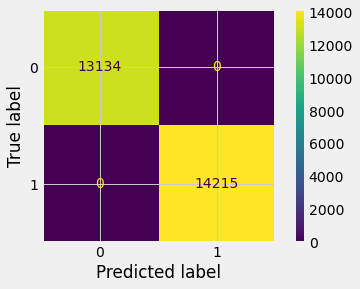

In [170]:
plot_confusion_matrix(dtc, X_train_pp, y_train.astype(int))

In [178]:
# TEST data
accuracy_score(y_test.astype(int), dtc_preds)

0.6646923330042778

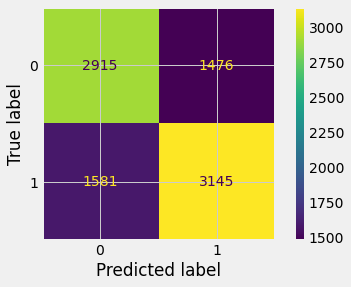

In [173]:
plot_confusion_matrix(dtc, X_te_pp, y_test.astype(int))

***********
#### KNN

In [193]:
knn = KNeighborsClassifier(weights='distance')

In [180]:
knn.fit(X_train_pp, y_train.astype(int))

KNeighborsClassifier()

In [182]:
knn_preds = knn.predict(X_train_pp)

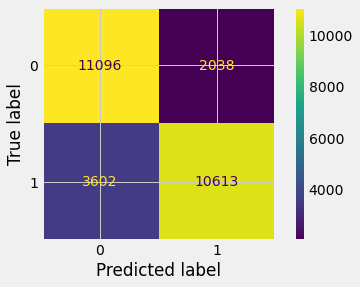

In [181]:
plot_confusion_matrix(knn, X_train_pp, y_train.astype(int))

In [183]:
accuracy_score(y_train.astype(int), knn_preds)

0.7937767377235

In [202]:
knn_grid = {'n_neighbors': [50, 60, 80]}

In [203]:
gs = GridSearchCV(knn, knn_grid)

In [204]:
gs.fit(X_train_pp, y_train.astype(int))

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [50, 60, 80]})

In [205]:
gs.best_params_

{'n_neighbors': 80}

In [257]:
# Train Accuracy: 80 neighbors - 100% train, 73% test (65% test recall)
# Train Accuracy: 60 neighbors - 100% train, 73% test (65% test recall)
# Train Accuracy: 50 neighbors - 100% train, 73% test (66% test recall)
# Train Accuracy: 40 neighbors - 100% train, 73% test (66% test recall)
# Train Accuracy: 30 neighbors - 100% train, 73% test (66% test recall)
# Train Accuracy: 20 neighbors - 100% train, 73% test (66% test recall)
# Train Accuracy: 10 neighbors - 100% train, 70% test (64% test recall)
# Train Accuracy: 15 neighbors - 100% train, 71.62% test (65% test recall)
knn2 = KNeighborsClassifier(n_neighbors=18, weights='distance')

In [258]:
knn2.fit(X_train_pp, y_train.astype(int))

KNeighborsClassifier(n_neighbors=18, weights='distance')

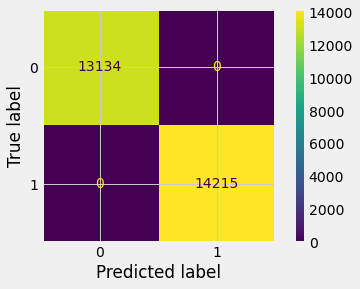

In [259]:
plot_confusion_matrix(knn2, X_train_pp, y_train.astype(int))

In [260]:
test_preds_knn2 = knn2.predict(X_te_pp)

In [262]:
recall_score(y_test.astype(int), test_preds_knn2)

0.6553110452814219

#### SVC

In [263]:
svc = SVC(C=0.1)

In [265]:
svc.fit(X_train_pp, y_train.astype(int))

SVC(C=0.1)

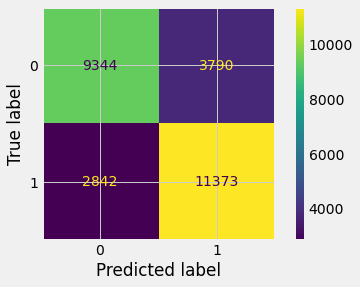

In [266]:
plot_confusion_matrix(svc, X_train_pp, y_train.astype(int))

In [267]:
svc_preds = svc.predict(X_train_pp)

In [269]:
accuracy_score(y_train.astype(int), svc_preds)

0.7575048447840872

In [270]:
recall_score(y_train.astype(int), svc_preds)

0.8000703482237074

#### GaussianNB

In [274]:
gnb = GaussianNB()

In [275]:
gnb.fit(X_train_pp, y_train.astype(int))

GaussianNB()

In [277]:
gnb_preds = gnb.predict(X_train_pp)

In [278]:
accuracy_score(y_train.astype(int), gnb_preds)

0.7125671871000768

In [279]:
recall_score(y_train.astype(int), gnb_preds)

0.5924727400633134

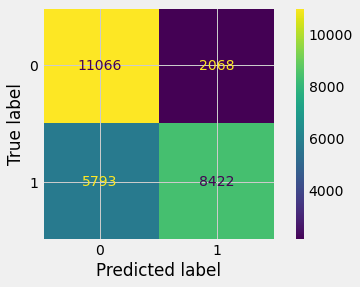

In [276]:
plot_confusion_matrix(gnb, X_train_pp, y_train.astype(int))

In [280]:
bnb = BernoulliNB(alpha=2)

In [281]:
bnb.fit(X_train_pp, y_train.astype(int))

BernoulliNB(alpha=2)

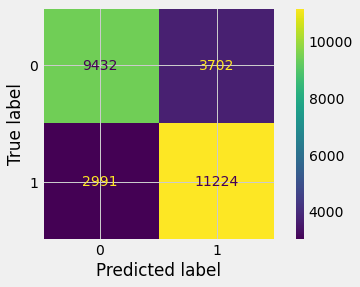

In [282]:
plot_confusion_matrix(bnb, X_train_pp, y_train.astype(int))

In [283]:
bnb_preds = bnb.predict(X_train_pp)

In [284]:
accuracy_score(y_train.astype(int), bnb_preds)

0.7552744158835789

In [285]:
recall_score(y_train.astype(int), bnb_preds)

0.789588462891312

#### RandomForest

In [286]:
rf = RandomForestClassifier()

In [287]:
rf.fit(X_train_pp, y_train.astype(int))

RandomForestClassifier()

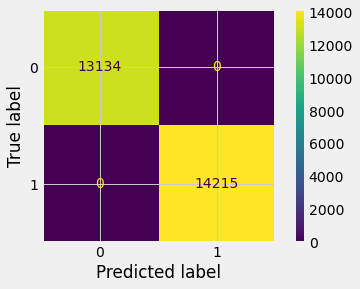

In [288]:
plot_confusion_matrix(rf, X_train_pp, y_train.astype(int))

In [292]:
rf_preds = rf.predict(X_te_pp)

In [294]:
# TEST DATA
accuracy_score(y_test.astype(int), rf_preds)

0.7494789952835362

In [295]:
recall_score(y_test.astype(int), rf_preds)

0.7835378755818875

In [296]:
rf_grid = {'n_estimators': [50,100,200],
          'max_depth': [],
          'max_features': []}

In [ ]:
gs_rf = GridSearchCV(rf, rf_grid)

In [302]:
heatmap_data = X_train_pp
heatmap_data['target'] = y_train.astype(int)

In [307]:
heatmap_data.corr()['target'].sort_values().iloc[:15]

x25_1               -0.730297
x26_0               -0.730297
x22_76-125          -0.547723
x13_Independent     -0.547723
x18_Probably Will   -0.547723
x21_21-25           -0.547723
x19_Yes             -0.471405
x23_0               -0.416667
x15_0               -0.416667
x14_Never           -0.416667
x4_Some College     -0.353553
x10_Yes/Some        -0.353553
x17_A-              -0.353553
x13_Mild Democrat   -0.353553
x5_40+              -0.353553
Name: target, dtype: float64

In [308]:
heatmap_data.corr()['target'].sort_values(ascending=False).iloc[:15]

target                 1.000000
x4_Graduated HS        0.750000
x23_11-20              0.730297
x11_Average            0.730297
x25_0                  0.730297
x26_1                  0.730297
x22_0                  0.730297
x19_No                 0.471405
x14_Every Week+        0.471405
x13_Other              0.471405
x13_Mild Republican    0.471405
x1_None                0.471405
x17_C                  0.471405
x13_Don't Know         0.471405
x5_3-5X                0.471405
Name: target, dtype: float64

### Model 8: Logistic Regression - NEW TARGET - Num Drugs Used in Past Year

In [ ]:
weed_hash_yr_freq
lsd_yr_freq
pysd_yr_freq
coke_yr_freq
amph_yr_freq
meth_yr_freq
sedbarb_yr_freq
tranq_yr_freq
heroin_yr_freq
narcotic_yr_freq
inhal_yr_freq